# Python's Module

In [1]:
import tensorflow as tf 
from tensorflow.keras import layers, models # tạo mô hình mạng nơ-ron
from keras.datasets import mnist # tải dữ liệu mnist
import matplotlib.pyplot as plt # vẽ đồ thị
import numpy as np # xử lý mảng ảnh
from PIL import Image # tiền xử lý ảnh đầu vào

# Data

## Data loading

## Preprocessing data

In [21]:
# Tải dữ liệu mnist, dữ liệu bao gồm 60000 ảnh dùng để train (train_images, train_labels) và 
# 10000 ảnh dùng để test (test_images, test_labels)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu ảnh về dạng 0-1
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Chuyển nhãn về dạng one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [3]:
print(train_images.shape, test_images.shape) # Kiểm tra lại kích thước dữ liệu

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Train, Test, Evaluation Model

## Xây dựng mô hình CNN

In [ ]:
model = models.Sequential() # Khởi tạo mô hình mạng nơ-ron CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Thêm lớp Conv2D với 32 bộ lọc 3x3
model.add(layers.MaxPooling2D((2, 2))) # Thêm lớp MaxPooling2D với kích thước 2x2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Thêm lớp Conv2D với 64 bộ lọc 3x3
model.add(layers.MaxPooling2D((2, 2))) # Thêm lớp MaxPooling2D với kích thước 2x2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Thêm lớp Conv2D với 64 bộ lọc 3x3, lớp này không có MaxPooling2D
model.summary() # Hiển thị thông tin mô hình

c:\Users\i77ht\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.add(layers.Flatten()) # Chuyển từ tensor 4 chiều về tensor 2 chiều
model.add(layers.Dense(64, activation='relu')) # Thêm lớp Dense với 64 nơ-ron, hàm kích hoạt relu
model.add(layers.Dense(10, activation='softmax')) # Thêm lớp Dense với 10 nơ-ron, hàm kích hoạt softmax
model.summary() # Hiển thị thông tin mô hình

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,354 (739.67 KB)

 Trainable params: 96,030 (375.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,324 (364.55 KB)

## Compile mô hình

In [24]:
# Biên dịch mô hình
# Hàm loss: categorical_crossentropy vì đây là bài toán phân loại nhiều lớp
# optimizer: rmsprop là một biến thể của gradient descent giúp tối ưu hóa mô hình
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Tổng quan lại model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,030 (375.12 KB)

 Trainable params: 96,030 (375.12 KB)

 Non-trainable params: 0 (0.00 B)

## Train mô hình

In [8]:
# Huấn luyện mô hình
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8694 - loss: 0.4023
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9842 - loss: 0.0519
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9900 - loss: 0.0319
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9927 - loss: 0.0237
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9947 - loss: 0.0191


## Evaluate mô hình 

In [9]:
# Đánh giá mô hình
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)
print(f'\nĐộ chính xác trên tập kiểm tra: {test_acc * 100:.2f}%')

1875/1875 - 3s - 2ms/step - accuracy: 0.9965 - loss: 0.0109

Độ chính xác trên tập kiểm tra: 99.65%


# Dự đoán chữ số do người dùng đưa vào

In [10]:
# Hàm tiền xử lý ảnh trước khi dự đoán
def preprocess_image(image_path):
    # Đọc ảnh
    img = Image.open(image_path).convert('L')  # Chuyển ảnh sang grayscale
    img = img.resize((28, 28))  # Thay đổi kích thước về 28x28
    img_array = np.array(img) / 255.0  # Chuẩn hóa về khoảng [0, 1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Thêm chiều thứ 4
    return img_array

In [11]:
# Hàm dự đoán chữ số trên ảnh
def predict_image(image_path, model):
    # Xử lý ảnh
    img_array = preprocess_image(image_path)
    
    # Dự đoán
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    
    # Hiển thị kết quả
    plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
    plt.title(f"Số dự đoán: {predicted_label}\n Độ chính xác: {np.max(prediction) * 100:.2f}%")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


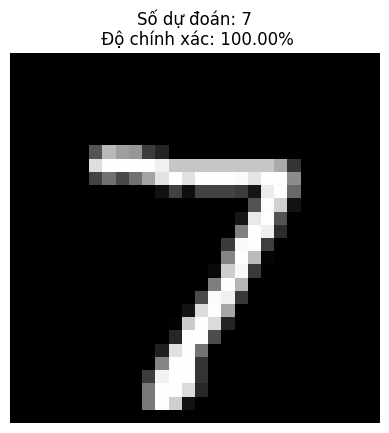

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


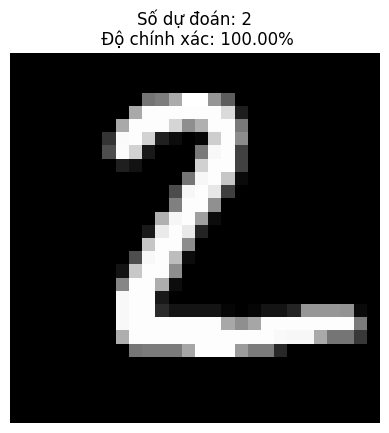

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


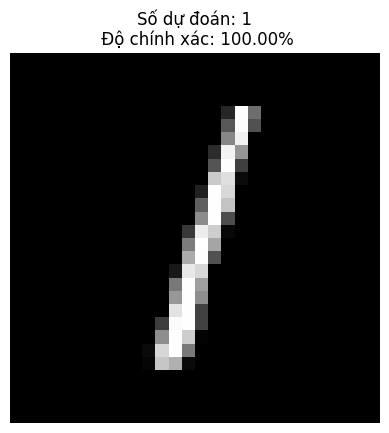

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


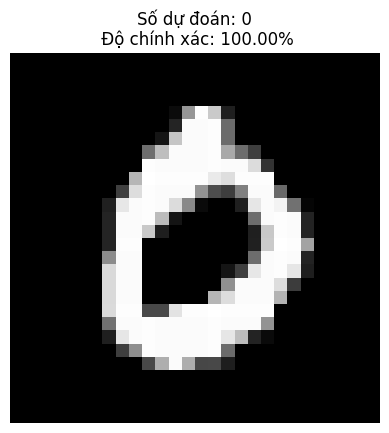

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


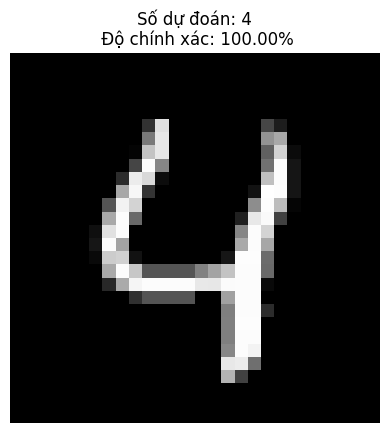

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


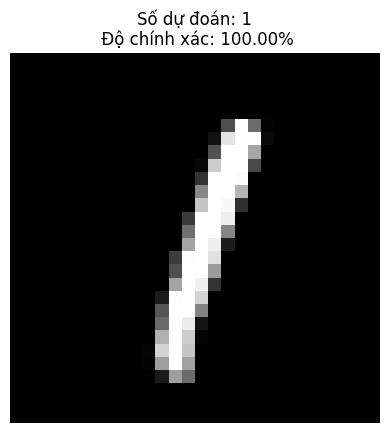

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


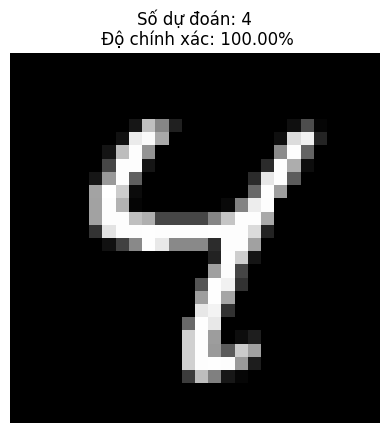

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


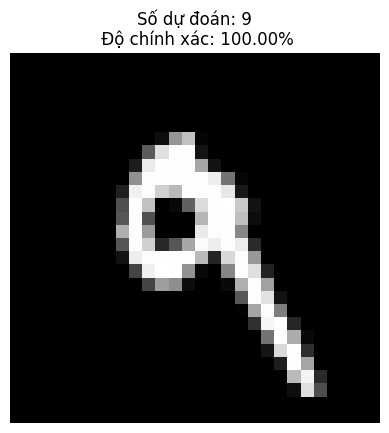

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


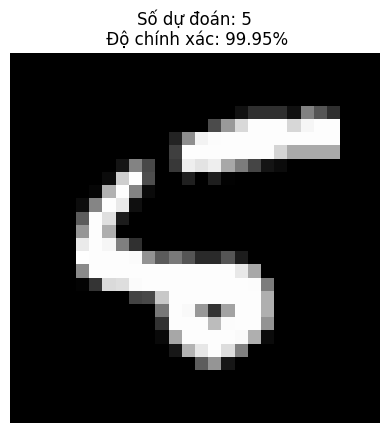

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


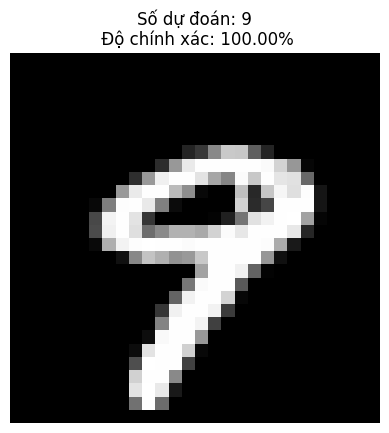

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


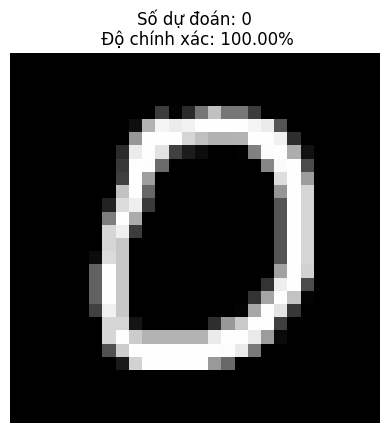

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


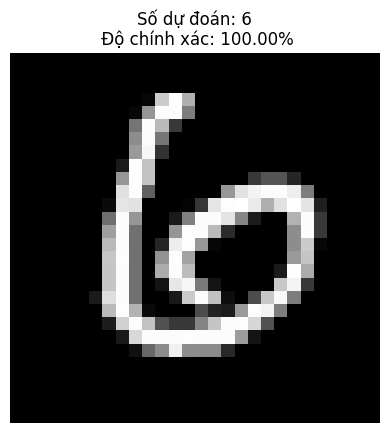

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


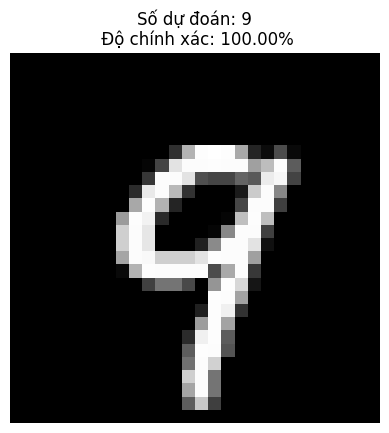

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


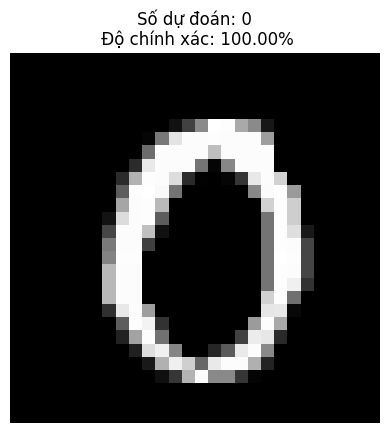

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


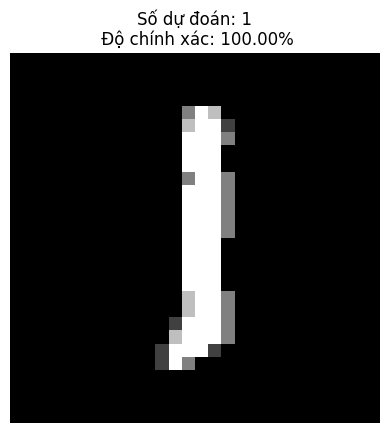

In [ ]:
# Dự đoán trên ảnh test
# Tập test này nằm trong tập test_images của mnist
for i in range(15):
    image_path = f'img\\test_image_{i}.png'
    predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


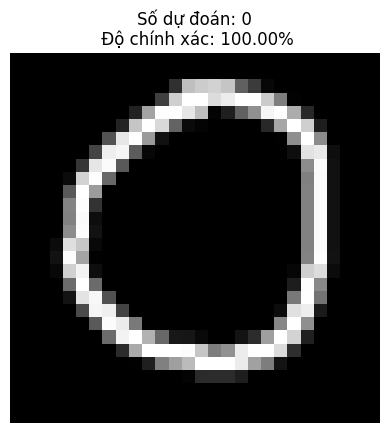

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


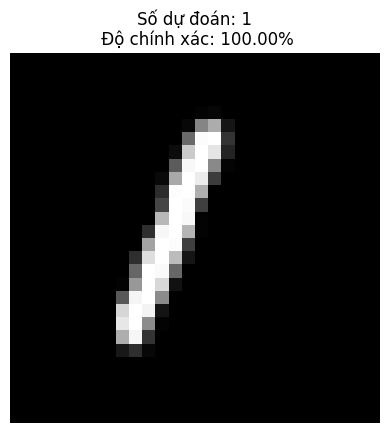

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


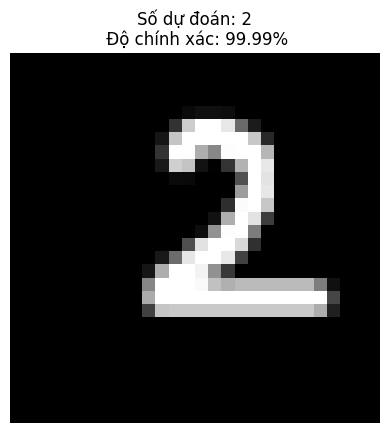

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


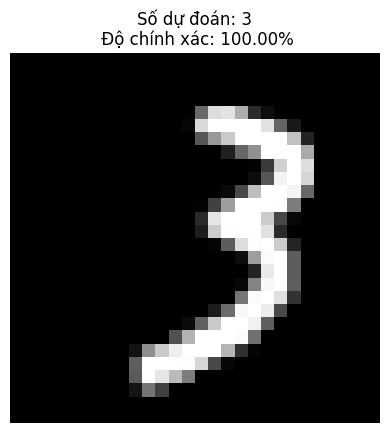

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


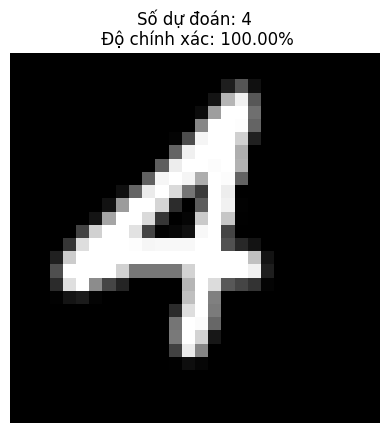

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


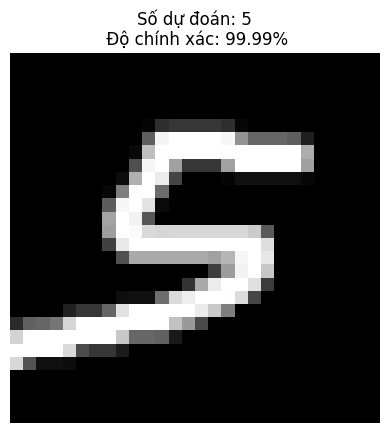

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


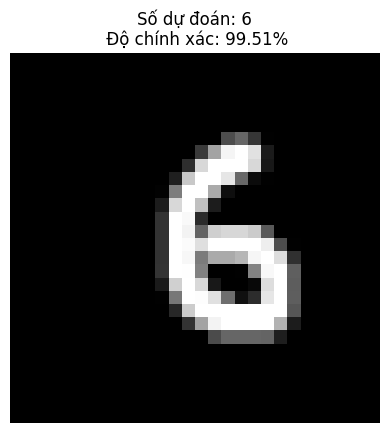

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


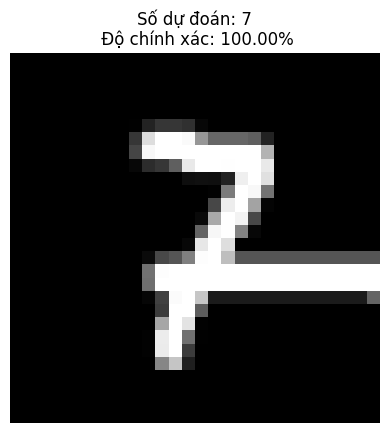

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


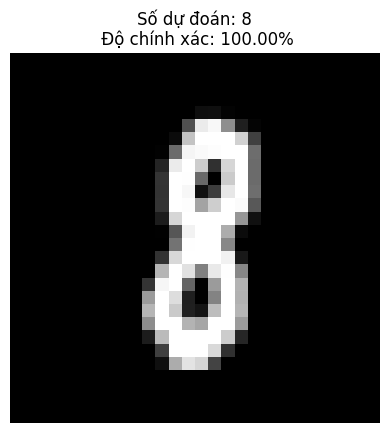

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


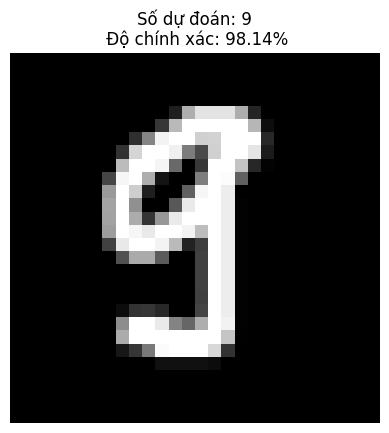

In [ ]:
# Dự đoán trên ảnh test
# Tập test này nằm ngoài tập test_images của mnist, bao gồm các chữ số được nhóm viết tay lại
for i in range(10):
    image_path = f'img\\handwrite_{i}.png'
    predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


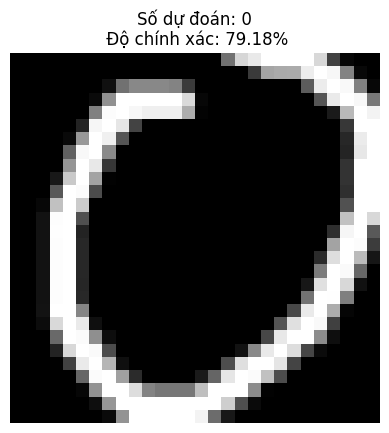

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


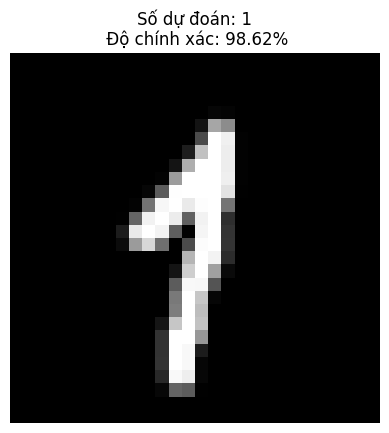

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


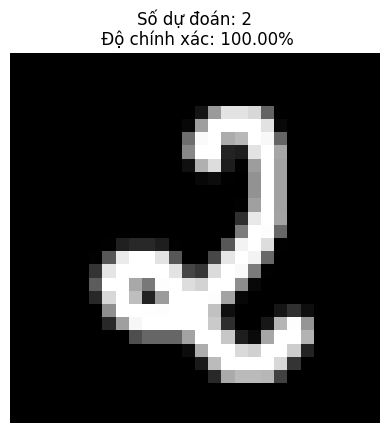

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


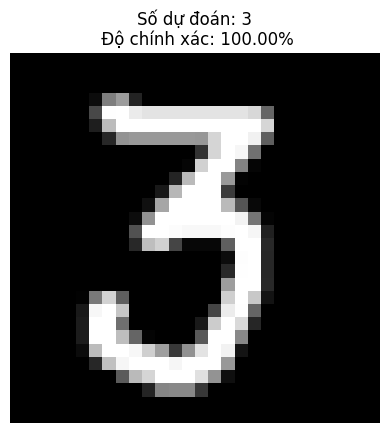

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


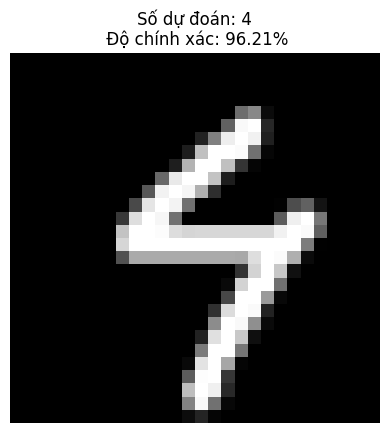

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


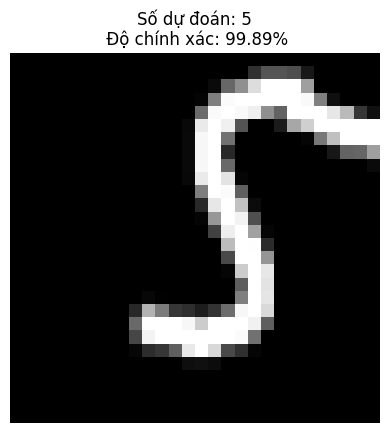

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


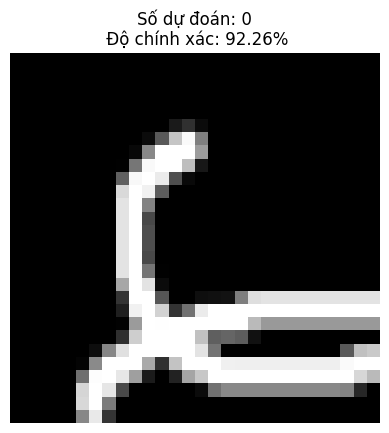

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


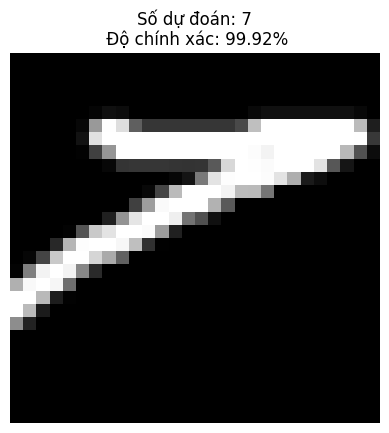

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


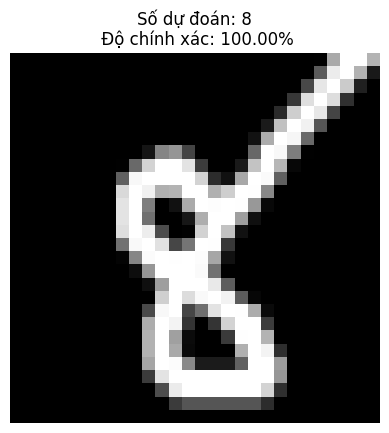

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


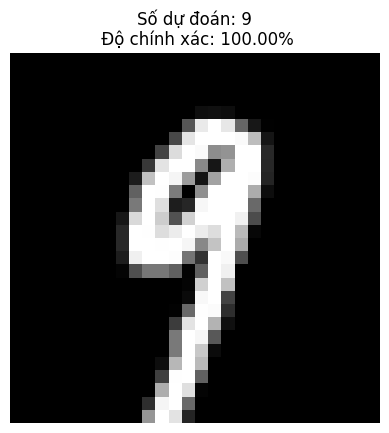

In [20]:
# Dự đoán trên ảnh test
# Đây là các trường hợp viết tay lại nhưng nó rất xấu (bad case)
# Mô hình sẽ không dự đoán chính xác hoặc dự đoán chính xác với độ chính xác không cao
for i in range(10):
    image_path = f'img\\bad_case_{i}.png'
    predict_image(image_path, model)